In [ ]:
# preamble to be able to run notebooks in Jupyter and Colab
try:
    from google.colab import drive
    import sys
    
    drive.mount('/content/drive')
    notes_home = "/content/drive/Shared drives/CSC310/ds/notes/"
    user_home = "/content/drive/My Drive/"
    
    sys.path.insert(1,notes_home) # let the notebook access the notes folder

except ModuleNotFoundError:
    notes_home = "" # running native Jupyter environment -- notes home is the same as the notebook
    user_home = ""  # under Jupyter we assume the user directory is the same as the notebook

# Data Visualization - Of Scatter, Bars, and Pies

## Pandas Based Visualization

We looked at some basic visualization techniques in slide set [05 Processing Pipeline](https://nbviewer.jupyter.org/github/lutzhamel/ds/blob/master/notes/05-processing-pipeline.ipynb).  The good news is that Pandas dataframes know how to do a lot of predefined visualization.

Give ourselves access to matplotlib as the underlying visualization library:

In [ ]:
%matplotlib inline

Get our Pandas DataFrames:

In [ ]:
import pandas as pd

Get our data set:

In [ ]:
iris_df = pd.read_csv(notes_home+"assets/iris.csv")

In [ ]:
iris_df.head()

,id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_df.drop(['id'], axis=1, inplace=True)

## Basic Plots

Arguably the most important plots, that is, plots that data scientists most frequently use are:
* The **histogram** for displaying basic distribution information of numeric columns.
* The **bar plot** for displaying basic mode information for categorical columns.
* The **scatter plot** for displaying basic relationships between two variables.

### The **Histogram**

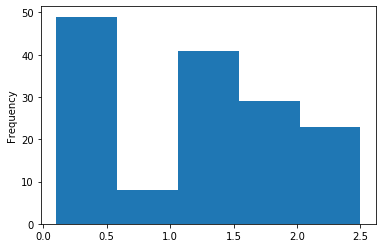

In [ ]:
iris_df.loc[:,'Petal.Width'].plot.hist(bins=5)

### The Density Plot

An alternative to histograms are density plots (kernel density estimators - kde) which display the same information in a continuous format.

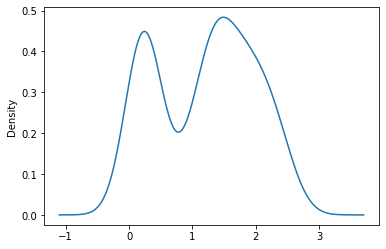

In [ ]:
iris_df.loc[:,'Petal.Width'].plot.kde()

### The **Bar Chart**

Here we have to do some preprocessing before we can plot the levels of the column - we have to actually count the number of times particular levels occur in a categorical column.  The  function `value_counts` can be applied the categorical columns which creates a table of the number of times each label occurred in a column.

In [ ]:
iris_df.loc[:,'Species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

Let's build the graph.

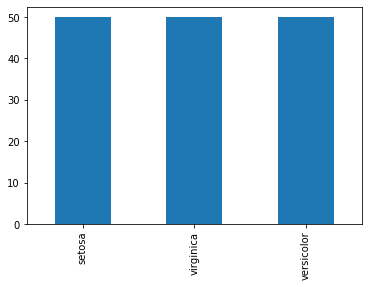

In [ ]:
iris_df.loc[:,'Species'].value_counts().plot.bar()

### The Pie Chart

The same information as the bar chart can be displayed in a visually appealing **pie chart**.  The only caveat 
here is that we want to get rid of the column/series name because the package displays it in kind of a strange fashion.

In [ ]:
plot_series = iris_df.loc[:,'Species'].rename('') # get rid of the 'Species' label

Remember: a *series* is just a 1-D dataframe.

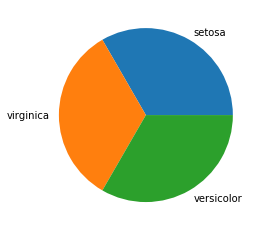

In [ ]:
plot_series.value_counts().plot.pie() # plot the value counts of the labels

### Scatter Plots

Scatter plots allow us to examine the relationship between columns in a dataframe.

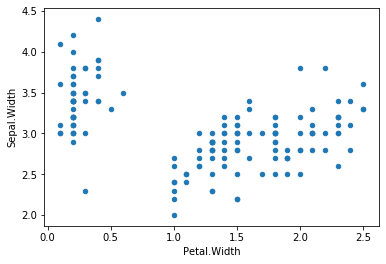

In [ ]:
iris_df.plot.scatter(x='Petal.Width', y='Sepal.Width')

As you can see, this is a powerful visualization technique by showing us that based on these two columns we basically can classify the iris dataset into two very well defined clusters.

### Scatter Matrix

Rather than looking at each column pair individual the `scatter_matrix` function allows the user view all the pairwise relationships in one go.

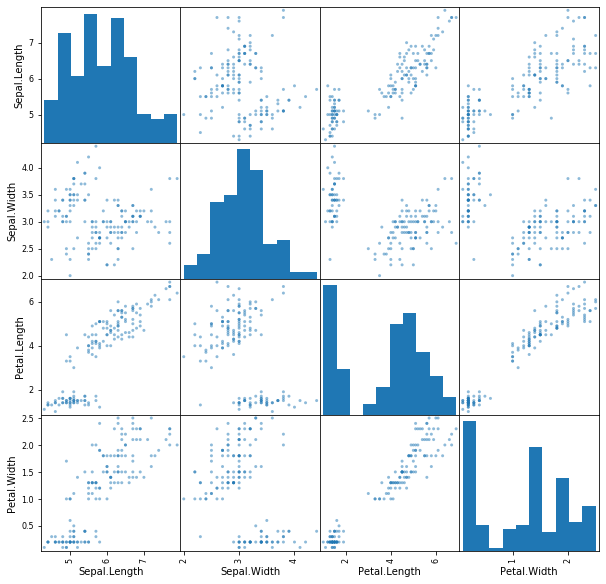

In [ ]:
null = pd.plotting.scatter_matrix(iris_df, figsize=[10,10])

### Basic Plotting Summary

* ‘bar’ or ‘barh’ for bar plots
* ‘hist’ for histogram
* ‘box’ for boxplot
* ‘kde’ or 'density' for density plots
* ‘area’ for area plots
* ‘scatter’ for scatter plots
* ‘hexbin’ for hexagonal bin plots
* ‘pie’ for pie plots

For more info [Pandas Basic Plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html#basic-plotting-plot).

## Seaborn Based Visualization

[Seaborn](http://seaborn.pydata.org) is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.  Seaborn integrates nicely with Pandas dataframes.

In [ ]:
import seaborn as sns
sns.set()

Let's repeat the experiments from above but with Seaborn.

In [ ]:
iris_df = pd.read_csv(notes_home+"assets/iris.csv")
iris_df.drop(['id'], axis=1, inplace=True)

### Histograms

In the Seaborn world this is done with [`distplot`](http://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot).

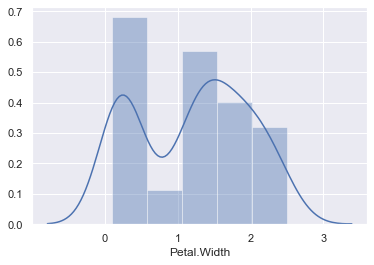

In [ ]:
sns.distplot(iris_df.loc[:,'Petal.Width'], hist=True, kde=True, bins=5)

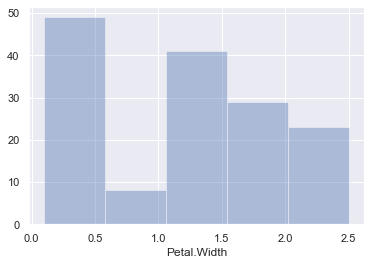

In [ ]:
sns.distplot(iris_df.loc[:,'Petal.Width'], hist=True, kde=False, bins=None)

**Note**: if you do not specify *bins* then `distplot` will use the Freedman-Diaconis rule to compute the optimal number of bins for the data.

### Bar Charts

Seaborn also supports bar charts called [`countplots`](http://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot).

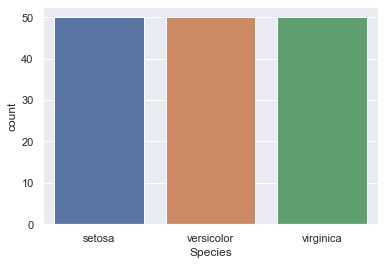

In [ ]:
sns.countplot(iris_df.loc[:,'Species'])

Notice that there is not preprocessing necessary compared to the Pandas bar charts.

### Scatter Plots

Seaborn does things just a bit different than expected...scatter plots are called [`pairplots`](http://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot).

/Users/lutz/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


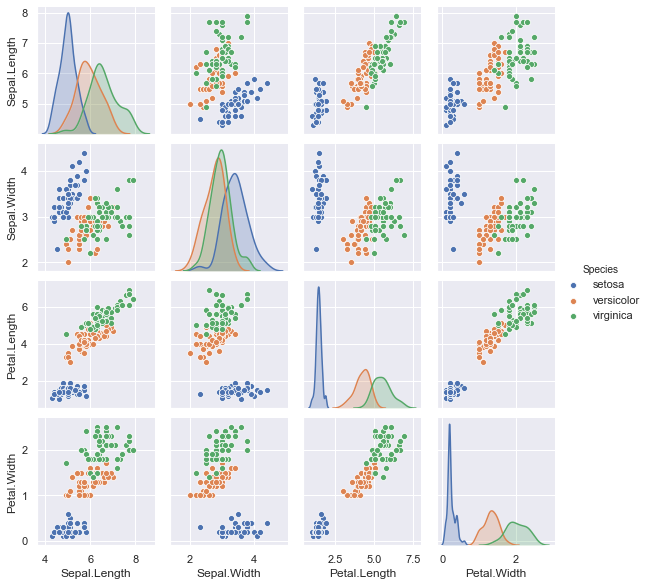

In [ ]:
sns.pairplot(iris_df, hue='Species', size=2)

We can also look at individual pairs of variables.

/Users/lutz/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


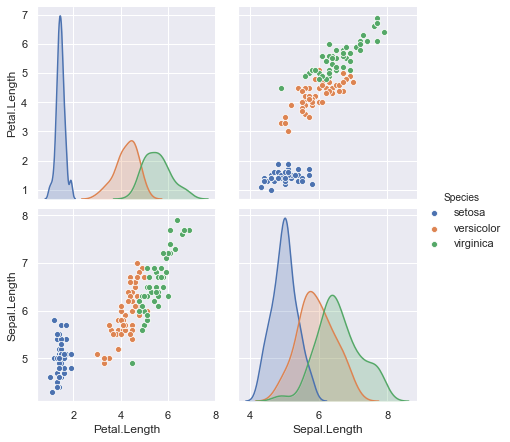

In [ ]:
sns.pairplot(iris_df, hue='Species', size=3, vars=["Petal.Length", "Sepal.Length"])

Seaborn has another plot called the [`jointplot`](http://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot) that allows you to compare two variables.  Here is one that draws a scatterplot with marginal histograms.

/Users/lutz/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


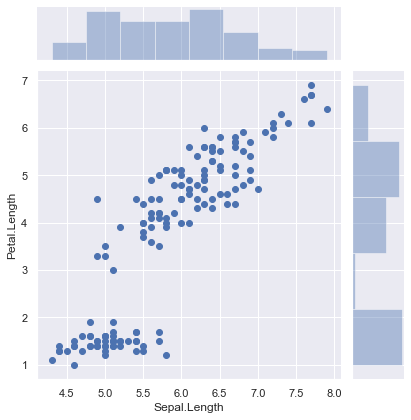

In [ ]:
sns.jointplot(x="Sepal.Length", y="Petal.Length", data=iris_df, size=6)

Same thing as a density plot.

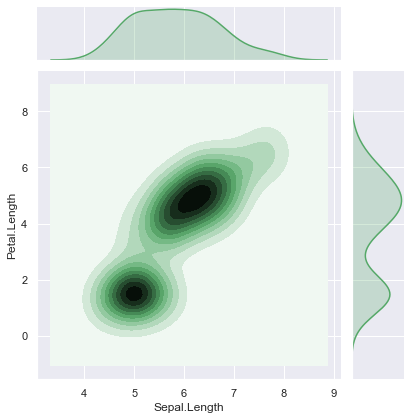

In [ ]:
sns.jointplot(x="Sepal.Length", y="Petal.Length", data=iris_df, size=6, kind="kde", color="g")

# Visualizations and Models

Let's see if we can relate our decision tree model to what we are seeing in the data for the Iris data set.

In [ ]:
from sklearn import tree
from assets.treeviz import tree_print
from sklearn.metrics import accuracy_score

In [ ]:
iris_df = pd.read_csv(notes_home+"assets/iris.csv")

In [ ]:
features_df = iris_df.drop(['id','Species'],axis=1)
features_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
target_df = pd.DataFrame(iris_df['Species'])
target_df.head()

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(features_df,target_df)
tree_print(dtree,features_df)

if Petal.Length =< 2.449999988079071: 
  |then setosa
  |else if Petal.Width =< 1.75: 
  |  |then if Petal.Length =< 4.950000047683716: 
  |  |  |then if Petal.Width =< 1.6500000357627869: 
  |  |  |  |then versicolor
  |  |  |  |else virginica
  |  |  |else if Petal.Width =< 1.550000011920929: 
  |  |  |  |then virginica
  |  |  |  |else if Petal.Length =< 5.450000047683716: 
  |  |  |  |  |then versicolor
  |  |  |  |  |else virginica
  |  |else if Petal.Length =< 4.8500001430511475: 
  |  |  |then if Sepal.Length =< 5.950000047683716: 
  |  |  |  |then versicolor
  |  |  |  |else virginica
  |  |  |else virginica
<------------->
Tree Depth:  5


Too complicated, let's reduce the complexity of the model a bit.

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2,random_state=4)
dtree.fit(features_df,target_df)
tree_print(dtree,features_df)

if Petal.Length =< 2.449999988079071: 
  |then setosa
  |else if Petal.Width =< 1.75: 
  |  |then versicolor
  |  |else virginica
<---->
Tree Depth:  2


In [ ]:
predict_array = dtree.predict(features_df)      # produces an array of labels
predicted_labels = pd.DataFrame(predict_array)  # turn it into a DF
predicted_labels.columns = ['Species']          # name the column - same name as in target!
print("Our model accuracy is: {}".format(accuracy_score(target_df, predicted_labels)))

Our model accuracy is: 0.96


Let's plot our tree model ontop of the scatter plot of the `Petal.Length` and `Petal.Width` variables.

In [ ]:
import matplotlib.pyplot as plt
shrink_df = iris_df[['Petal.Width','Petal.Length','Species']]
shrink_df.head()

,Petal.Width,Petal.Length,Species
0,0.2,1.4,setosa
1,0.2,1.4,setosa
2,0.2,1.3,setosa
3,0.2,1.5,setosa
4,0.2,1.4,setosa


In [ ]:
setosa_df = shrink_df[shrink_df.Species == 'setosa']
versicolor_df = shrink_df[shrink_df.Species == 'versicolor']
virginica_df = shrink_df[shrink_df.Species == 'virginica']

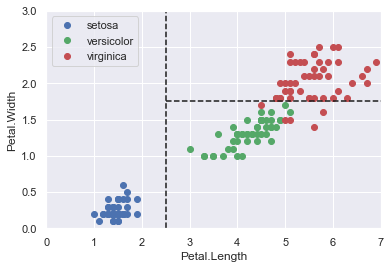

In [ ]:
# scatter plot of the data
plt.plot(setosa_df['Petal.Length'],setosa_df['Petal.Width'],'bo')
plt.plot(versicolor_df['Petal.Length'],versicolor_df['Petal.Width'],'go')
plt.plot(virginica_df['Petal.Length'],virginica_df['Petal.Width'],'ro')
plt.axis([0, 7, 0, 3])
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend(['setosa','versicolor','virginica'])

# plotting the tree decision surfaces
plt.plot([2.5,2.5],[0,3.0],'k--')
plt.plot([2.5,7.0],[1.75,1.75], 'k--')

Our model found the patterns in the data that allows the separation of the three classes of iris flowers. The decision tree is also often called a *piecewise linear model* because it induces *linear decision surfaces* with in the data.

# Reading

* 4.5 [Histograms, Binnings, and Density](https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html)
* 4.14 [Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)
* [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
* [Seaborn Homepage](http://seaborn.pydata.org/index.html)
* [Matplotlib Pyplot Tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)


# Team Project

In this project you will work with your last team to explore the second data set that you had to pick for the last assignment.

1. Use the visualization tools presented in this slide set to look at the data set. Are your independent variables uni- or multimodal? Can you identify clusters when performing scatter plots?  Are those clusters related to your decision tree model from the last lab? What about the different labels/levels of your dependent variable - are they equally represented, that is, is your data set well balanced? If so why, if not how do you think the imbalance shows up in your tree model?

2. Find the simplest decision tree model whose accuracy is at least 80% of the accuracy of the best model you built in the previous assignment. E.g. if you best model had an accuracy of 0.95 then the simplified model should have an accuracy of not less than 0.95*0.8=0.75.  How does the best decision tree model from your last assignment and your new, simplified model compare in terms of interpretability?  Do they agree on the major trends/classifications? Can you relate the decision tree of the simplified model to clusters you have discovered in the previous part of this assignment?


## Teams

(see BrightSpace)